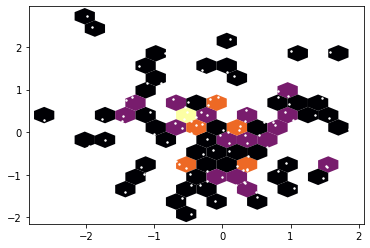

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
x = np.random.normal(size=(1, 100))
y = np.random.normal(size=(1, 100))
plt.hexbin(x,y,gridsize=15, mincnt=1, edgecolors="none", cmap="inferno")
plt.scatter(x,y, s=2, c="white")
plt.show()

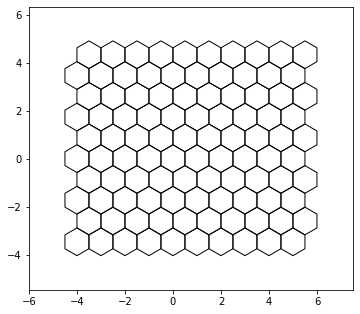

In [2]:
from hexalattice.hexalattice import *
hex_centers, _ = create_hex_grid(n=100,do_plot=True)
plt.show()    # import matplotlib.pyplot as plt

# Grid

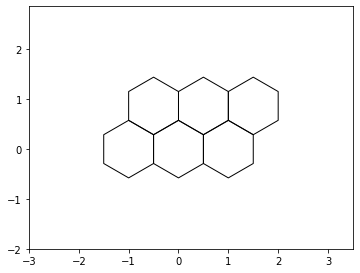

In [3]:
from hexalattice.hexalattice import *
hex_centers, _ = create_hex_grid(nx=3,
                                 ny=2,
                                 do_plot=True,
                                min_diam=1)
                                 
plt.show()    # import matplotlib.pyplot as plt

# Circle

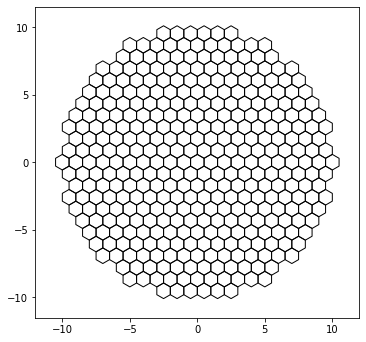

In [4]:
from hexalattice.hexalattice import *
hex_grid1, h_ax = create_hex_grid(nx=30,
                                  ny=30,
                                  rotate_deg=0,
                                  min_diam=1,
                                  crop_circ=10,
                                  do_plot=True)
plt.show()    # import matplotlib.pyplot as plt

In [5]:
from shapely.geometry import Point, Polygon, MultiPolygon
import math
def create_hexagon(l, x, y):
    """
    Create a hexagon centered on (x, y)
    :param l: length of the hexagon's edge
    :param x: x-coordinate of the hexagon's center
    :param y: y-coordinate of the hexagon's center
    :return: The polygon containing the hexagon's coordinates
    """
    c = [[x + math.cos(math.radians(angle)) * l, y + math.sin(math.radians(angle)) * l] for angle in range(0, 360, 60)]
    return Polygon(c)

In [6]:
polygon1 = create_hexagon(1,1,1)

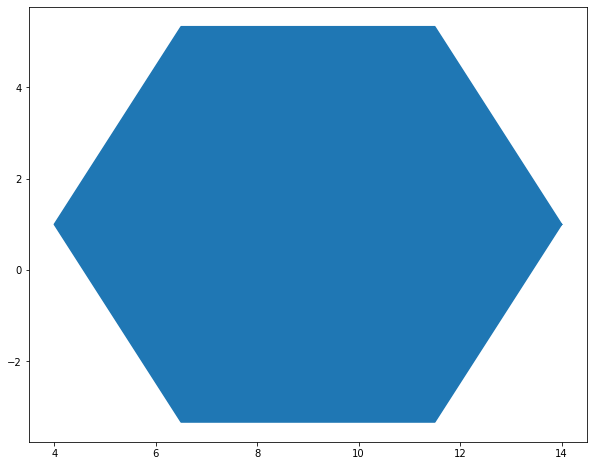

In [94]:
import matplotlib.pyplot as plt
fig2, ax2 = plt.subplots(figsize=(10, 8))

x,y = polygon1.exterior.xy
ax2.plot(x,y)
ax2.fill_between(x, y)


(0, 1)

(1, 1)

(2, 1)

(3, 1)

(4, 1)

(5, 1)

(6, 1)

(7, 1)

(8, 1)

(9, 1)

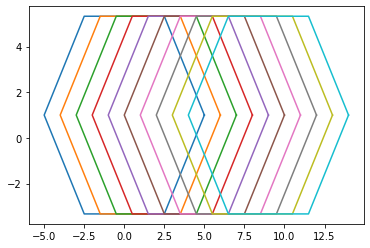

In [8]:
lenth = 5
x = [i for i in range(10)]
y = [1 for i in range(10)]
for i in zip(x,y):
    i
    polygon1 = create_hexagon(5,i[0],i[1])
    x,y = polygon1.exterior.xy
    plt.plot(x,y)

In [9]:
# def pointy_hex_corner(center, size, i):
#     angle_deg = 60 * i - 30°
#     angle_rad = PI / 180 * angle_deg
#     return Point(center.x + size * cos(angle_rad),
#                  center.y + size * sin(angle_rad))

In [10]:
import collections
Point = collections.namedtuple("Point", ["x", "y"])
_Hex = collections.namedtuple("Hex", ["q", "r", "s"])
def Hex(q, r, s):
    assert not (round(q + r + s) != 0), "q + r + s must be 0"
    return _Hex(q, r, s)
# Hex(1,-1,0)

In [11]:
import math
def flat_hex_to_pixel(size, hex):
    theta = np.sin(np.pi / 3)  #sin60*  = np.sqrt(3)
#     x = size * (                         3./2 * hex.q)
#     y = size * (theta/2 * hex.q  +  theta * hex.r)
    y = size * theta * (hex.s/2 + hex.r)*2
    x = 3./2 * size * hex.s
    return (x, y)

def pointy_hex_to_pixel(size, hex):
    theta = np.sin(np.pi / 3)  #sin60*  = np.sqrt(3)
#     x = size * (                         3./2 * hex.q)
#     y = size * (theta/2 * hex.q  +  theta * hex.r)
    y = size * theta * (hex.s/2 + hex.r)*2
    x = 3./2 * size * hex.s
    return (y,x)

In [12]:
# def cube_to_axial(cube):
#     var q = cube.q
#     var r = cube.r
#     return Hex(q, r)

In [108]:
import math
#radis代表生成的圆六角形的圈数 1为1个，2为6个外圈 3为6+6=12个外圈 4位18个外圈
def generate_radius_hexagon_flat(ax, radius, point, size=1, color='black',NoText=False):
    allHex1 = []
    allHexText1 = []
    deltas = [[1,0,-1],[0,1,-1],[-1,1,0],[-1,0,1],[0,-1,1],[1,-1,0]] #生成的方向
    allHex1.append(pointy_hex_to_pixel(size,Hex(point[0],point[1],point[2])))
    allHexText1.append(str(point))
    for r in range(radius):
#     print "radius %d" % r
        x = point[0]
        y = point[1]-r
        z = point[2]+r
    #     print x,y,z
        for j in range(6):
    #         if j==5:
    #             num_of_hexas_in_edge = r-1
    #         else:
            num_of_hexas_in_edge = r
            num_of_hexas_in_edge
            for i in range(num_of_hexas_in_edge):
                x = x+deltas[j][0]
                y = y+deltas[j][1]
                z = z+deltas[j][2]
                tmpText =str((x,y,z))
                allHexText1.append(tmpText)
                allHex1.append(pointy_hex_to_pixel(size,Hex(x,y,z)))
    drawHexgon(ax, allHex1, size, color)
    if NoText:
        drawHexgonText(ax,allHex1,allHexText1)
    return point
def drawHexgon(ax, allHex1, size, color):
    for index,item in enumerate(allHex1):
        polygon1 = create_hexagon_pointy(size,item[0],item[1])
        x,y = polygon1.exterior.xy
        ax.plot(x,y,color=color)
#         ax1.fill_between(x, y, facecolor=color)
        ax.scatter(*item, alpha=0.6, edgecolors='w',c="black")
#     if NoText:
#         for index,item in enumerate(allHex1):
#             ax.text(item[0], item[1],
#                                 f'{allHexText[index]}',
#                                 horizontalalignment='center', size='medium',
#                                 color='black', weight='semibold')
def drawHexgonText(ax,allHex1,allHexText1):
    for index,item in enumerate(allHex1):
            ax.text(item[0], item[1],
                                f'{allHexText1[index]}',
                                horizontalalignment='center', size='medium',
                                color='black', weight='semibold')
def generate_radius_hexagon_flag_num(ax,num,point=[0,0,0], size=1,color='black',NoText=False):
    radius = math.ceil(num/6)+1
    allHex1 = []
    allHexPoint = []
    deltas = [[1,0,-1],[0,1,-1],[-1,1,0],[-1,0,1],[0,-1,1],[1,-1,0]] #生成的方向
    allHex1.append(pointy_hex_to_pixel(size,Hex(point[0],point[1],point[2])))
    allHexPoint.append(point)
    for r in range(radius):
#     print "radius %d" % r
        x = point[0]
        y = point[1]-r
        z = point[2]+r
    #     print x,y,z
        for j in range(6):
    #         if j==5:
    #             num_of_hexas_in_edge = r-1
    #         else:
            num_of_hexas_in_edge = r
            num_of_hexas_in_edge
            for i in range(num_of_hexas_in_edge):
                x = x+deltas[j][0]
                y = y+deltas[j][1]
                z = z+deltas[j][2]
                tmpPoint =(x,y,z)
                allHexPoint.append(tmpPoint)
                allHex1.append(pointy_hex_to_pixel(size,Hex(x,y,z)))
    allHex1 = allHex1[0:num]
    allHexPoint = allHexPoint[0:num]
    allHex1_array = np.array(allHexPoint)
    max_Hex = np.max(allHex1_array,axis=0)
    drawHexgon(ax, allHex1, size, color)
    allHex_Text1 = [str(i) for i in allHexPoint]
    if NoText:
        drawHexgonText(ax,allHex1,allHex_Text1)
    return max_Hex

#生成 hexagon 坐标
def create_hexagon_pointy(l, x, y):
    """
    Create a hexagon centered on (x, y)
    :param l: length of the hexagon's edge
    :param x: x-coordinate of the hexagon's center
    :param y: y-coordinate of the hexagon's center
    :return: The polygon containing the hexagon's coordinates
    """
    c = [[x + math.cos(math.radians(angle)) * l, y + math.sin(math.radians(angle)) * l] for angle in range(30, 360, 60)]
    return Polygon(c)

[0, 0, 0]

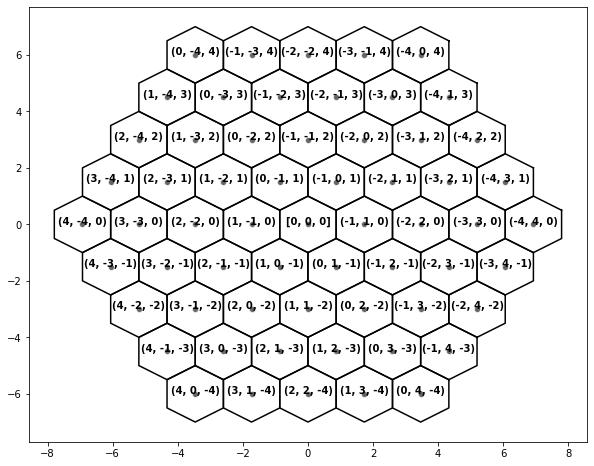

In [113]:
fig3, ax3 = plt.subplots(figsize=(10, 8))
generate_radius_hexagon_flat(ax3,5,[0,0,0],color='black',NoText=True)

array([3, 3, 2])

array([2, 1, 1])

array([1, 1, 0])

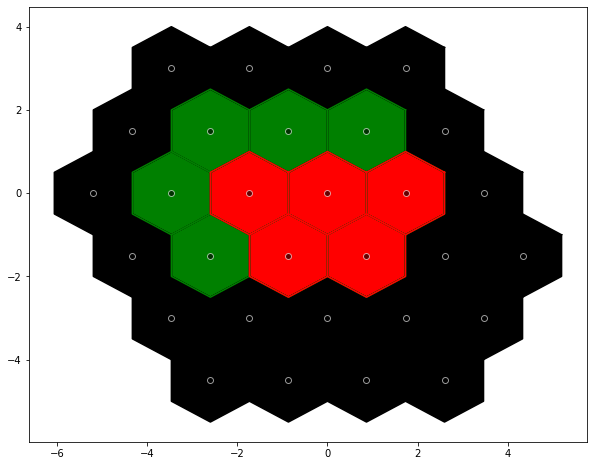

In [109]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
generate_radius_hexagon_flag_num(ax1,30,color='black')
generate_radius_hexagon_flag_num(ax1,10,color='green')
generate_radius_hexagon_flag_num(ax1,5,color='red')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

array([ 7, -2,  2])

array([-2,  4,  0])

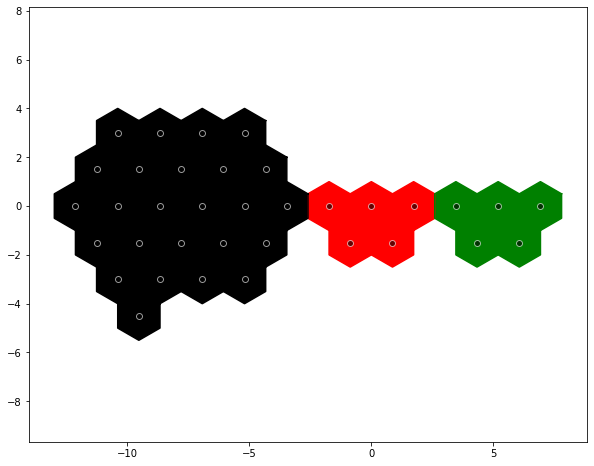

In [110]:
import math
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.axis('equal')
dataset = (30,10,5)
initPoint = [0, 0, 0]
set_radius = generate_radius_hexagon_flag_num(ax1,dataset[2],initPoint,color='red')
offset_1 = set_radius[0]
offset_1_radius = math.ceil(dataset[0]/6)+1-3
offset_1_init = [initPoint[0]+offset_1+offset_1_radius, initPoint[1]-offset_1-offset_1_radius, initPoint[2]]
generate_radius_hexagon_flag_num(ax1,dataset[0]-dataset[2],offset_1_init,color='black')

offset_2 = set_radius[1]
offset_2_radius = math.ceil(dataset[1]/6)+1-1

offset_2_init = [initPoint[0]-offset_2-offset_2_radius, initPoint[1]+offset_2+offset_2_radius, initPoint[2]]
generate_radius_hexagon_flag_num(ax1,dataset[1]-dataset[2],offset_2_init,color='green')




In [111]:
# # fig1 = plt.figure(figsize=)
# # ax1 = fig.add_subplot(111)
# fig1, ax1 = plt.subplots(figsize=(10, 8))
# initPoint = [-1,1,0]
# hex1 = generate_radius_hexagon_flat(ax1,2,initPoint,size=1,color='black',NoText=True)
# # generate_radius_hexagon_flat(ax,2,[-2,2,0],size=1,color='green')
# hex2 = generate_radius_hexagon_flat(ax1,2,[-4,4,0],size=1,color='green',NoText=True)


0

0

0

0

0

0

1

1

1

1

1

1

[(0.0, 0.0),
 (-1.7320508075688772, 0.0),
 (-0.8660254037844386, -1.5),
 (0.8660254037844386, -1.5),
 (1.7320508075688772, 0.0),
 (0.8660254037844386, 1.5),
 (-0.8660254037844386, 1.5)]

['[0, 0, 0]',
 '(1, -1, 0)',
 '(1, 0, -1)',
 '(0, 1, -1)',
 '(-1, 1, 0)',
 '(-1, 0, 1)',
 '(0, -1, 1)']

Text(0.0, 0.0, '[0, 0, 0]')

Text(-1.7320508075688772, 0.0, '(1, -1, 0)')

Text(-0.8660254037844386, -1.5, '(1, 0, -1)')

Text(0.8660254037844386, -1.5, '(0, 1, -1)')

Text(1.7320508075688772, 0.0, '(-1, 1, 0)')

Text(0.8660254037844386, 1.5, '(-1, 0, 1)')

Text(-0.8660254037844386, 1.5, '(0, -1, 1)')

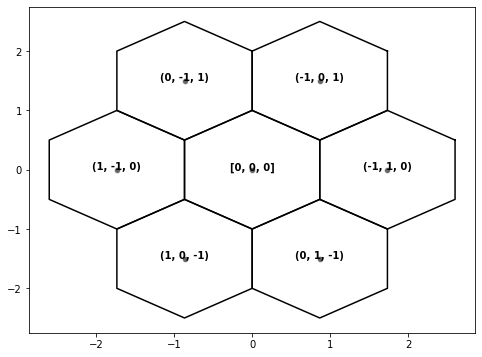

In [340]:
radius = 2
size = 1
deltas = [[1,0,-1],[0,1,-1],[-1,1,0],[-1,0,1],[0,-1,1],[1,-1,0]]
allHexText = []
allHex = []
initHex = [0,0,0] #   保持z不变是水平方向的移动 保持y不变是右上方移动 保持x不变是左上方移动

allHex.append(pointy_hex_to_pixel(size,Hex(initHex[0],initHex[1],initHex[2])))
allHexText.append(str(initHex))


for r in range(radius):
#     print "radius %d" % r
    x = initHex[0]
    y = initHex[1]-r
    z = initHex[2]+r
#     print x,y,z
    for j in range(6):
#         if j==5:
#             num_of_hexas_in_edge = r-1
#         else:
        num_of_hexas_in_edge = r
        num_of_hexas_in_edge
        for i in range(num_of_hexas_in_edge):
            x = x+deltas[j][0]
            y = y+deltas[j][1]
            z = z+deltas[j][2]
            tmpText =str((x,y,z))
            allHexText.append(tmpText)
            allHex.append(pointy_hex_to_pixel(size,Hex(x,y,z)))
#             print x,y,z
allHex
allHexText
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for index,item in enumerate(allHex):
    polygon1 = create_hexagon_pointy(size,item[0],item[1])
    x,y = polygon1.exterior.xy
    ax.plot(x,y,color='black')
    ax.scatter(*item, alpha=0.6, edgecolors='w',c="black")
    ax.text(item[0], item[1],
                        f'{allHexText[index]}',
                        horizontalalignment='center', size='medium',
                        color='black', weight='semibold')

In [15]:
from shapely.geometry import Point, Polygon, MultiPolygon
import math
def create_hexagon_pointy(l, x, y):
    """
    Create a hexagon centered on (x, y)
    :param l: length of the hexagon's edge
    :param x: x-coordinate of the hexagon's center
    :param y: y-coordinate of the hexagon's center
    :return: The polygon containing the hexagon's coordinates
    """
    c = [[x + math.cos(math.radians(angle)) * l, y + math.sin(math.radians(angle)) * l] for angle in range(30, 360, 60)]
    return Polygon(c)

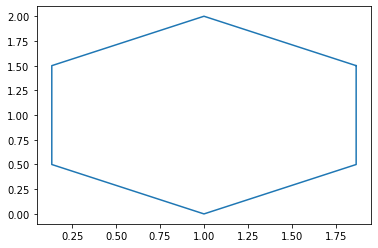

In [224]:
polygon1 = create_hexagon_pointy(1,1,1)
import matplotlib.pyplot as plt
x,y = polygon1.exterior.xy
plt.plot(x,y)

# Venn Diagram

In [113]:
type_num = 2
dataset = (30,10,5)

In [20]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

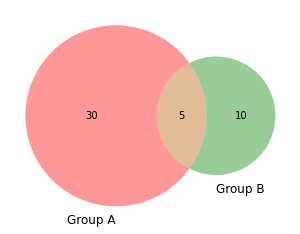

In [21]:
venn2(subsets = dataset, set_labels = ('Group A', 'Group B'))